In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

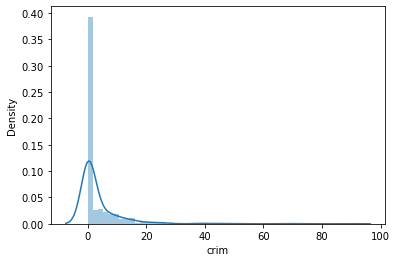

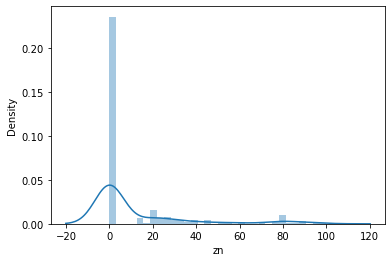

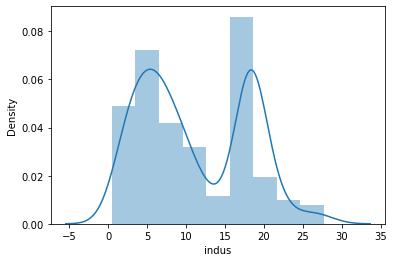

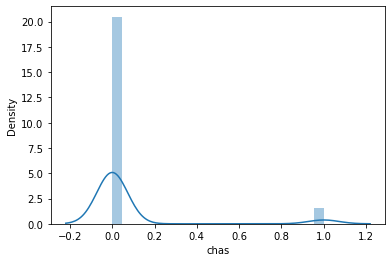

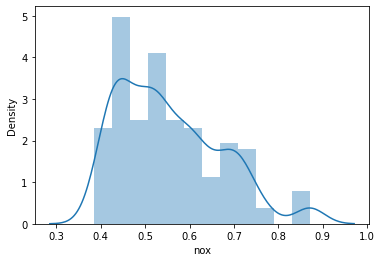

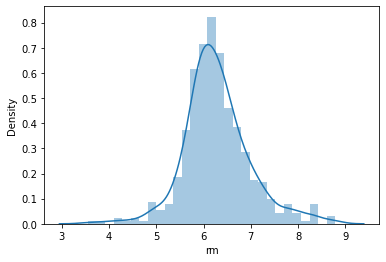

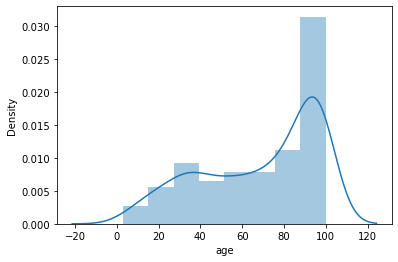

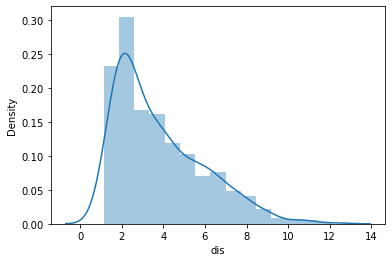

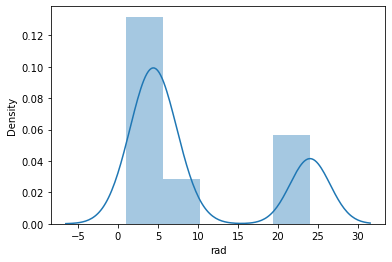

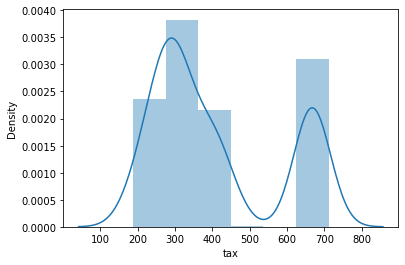

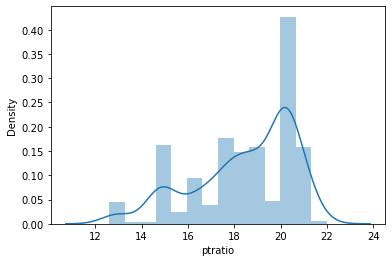

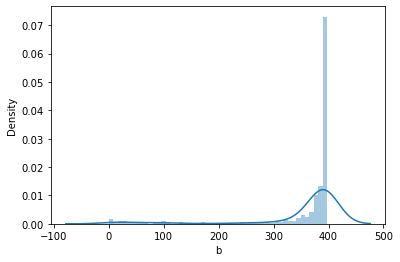

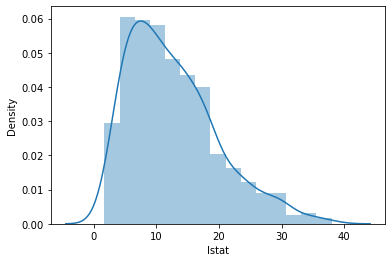

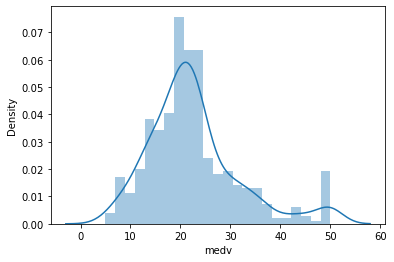

In [44]:
for col in df:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

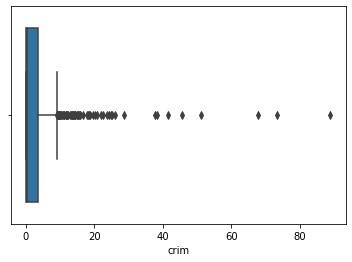

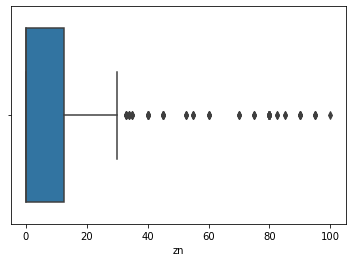

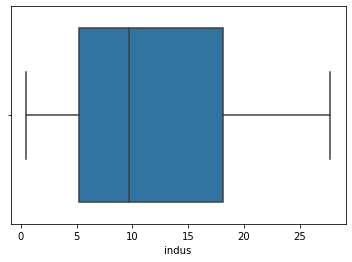

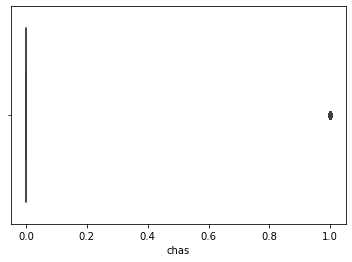

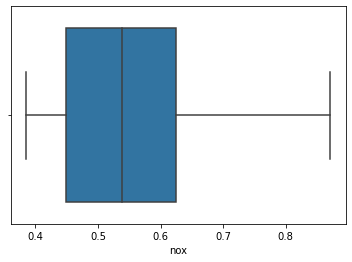

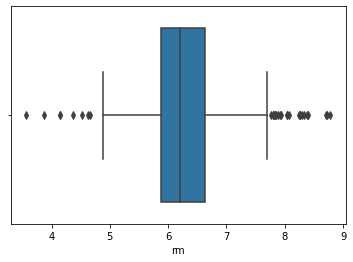

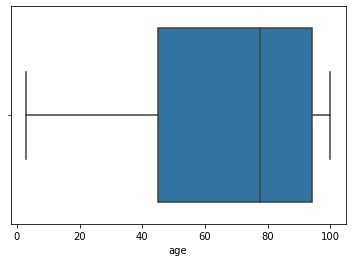

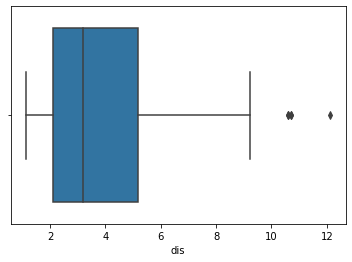

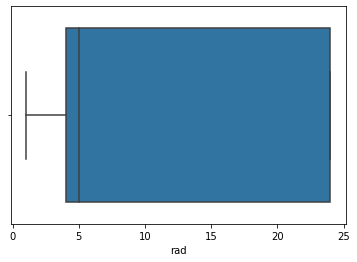

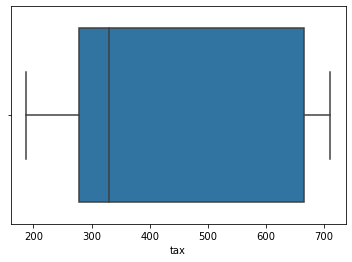

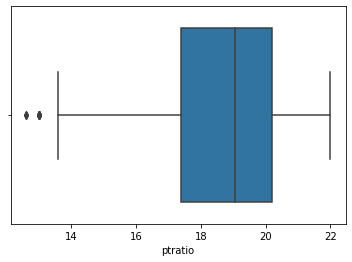

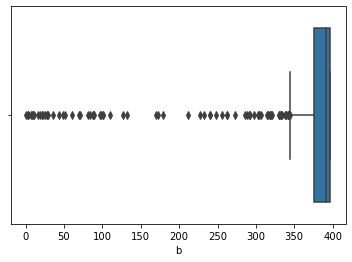

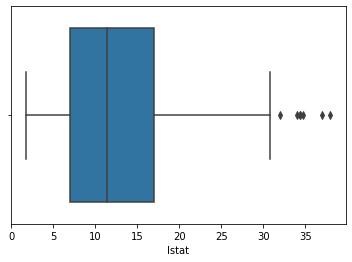

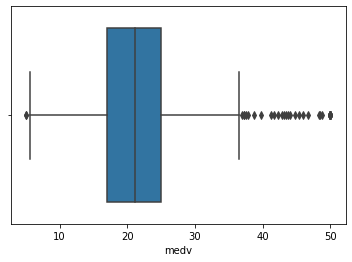

In [45]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

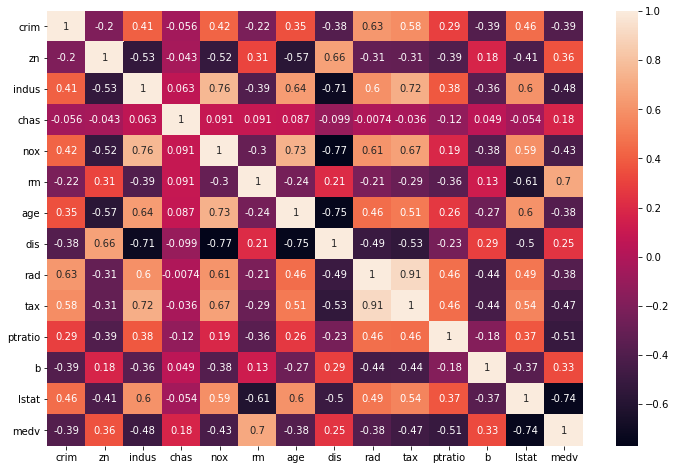

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
## Data Visualization.

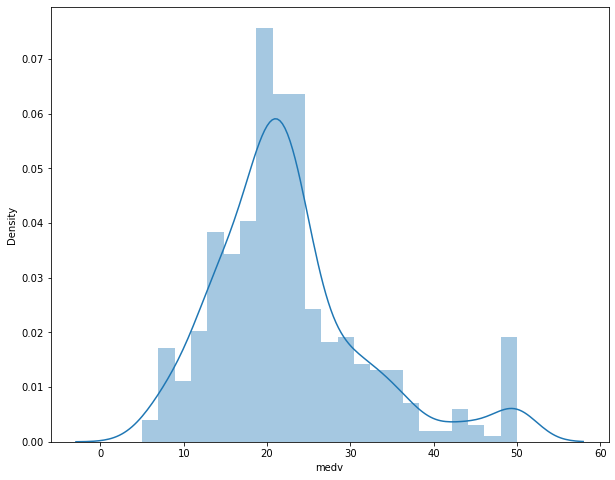

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(df['medv'])
plt.show()

In [13]:
# compute the pair wise correlation for all columns
correlation_matrix = df.corr().round(2)

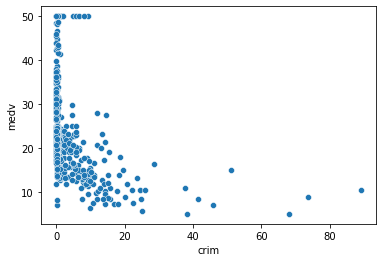

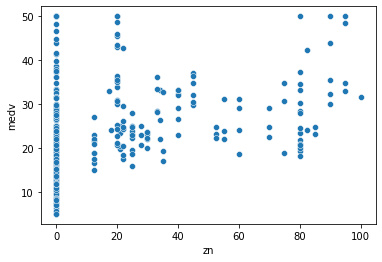

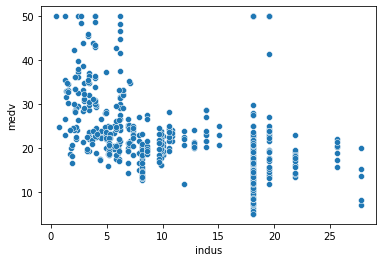

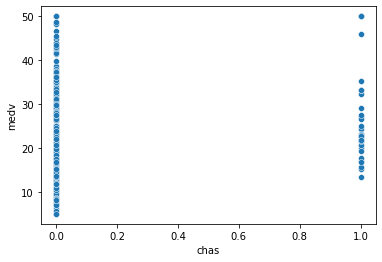

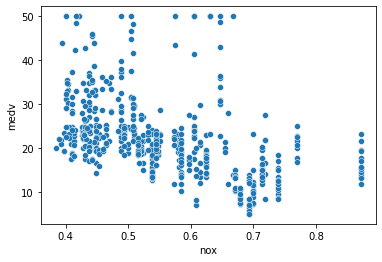

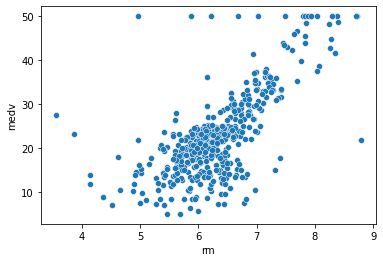

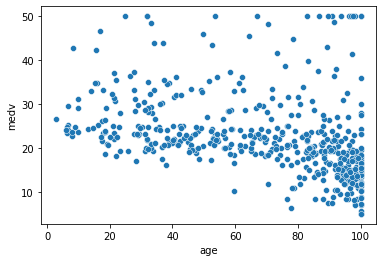

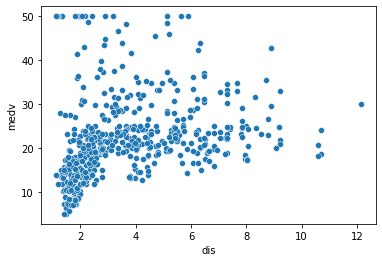

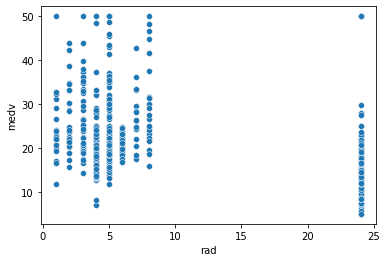

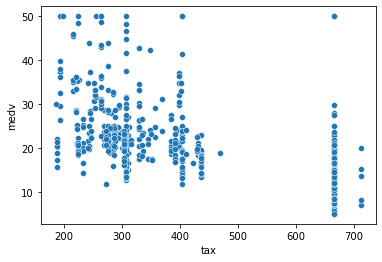

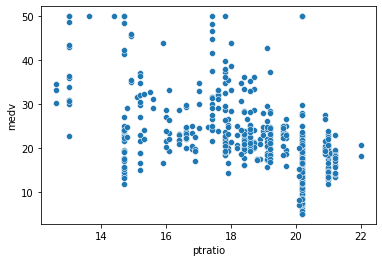

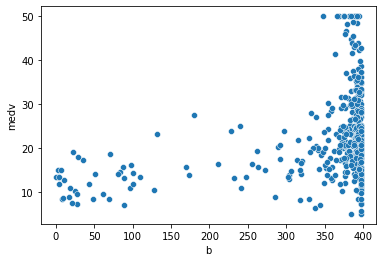

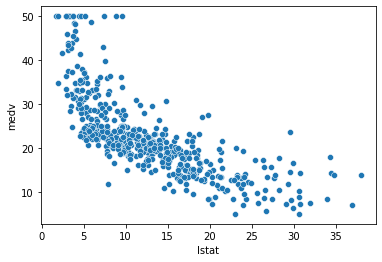

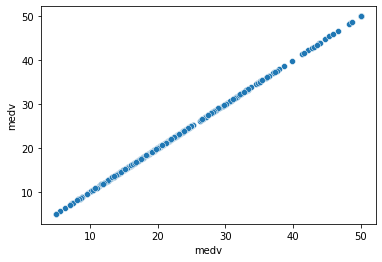

In [46]:
for col in df:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="medv")
    plt.show()

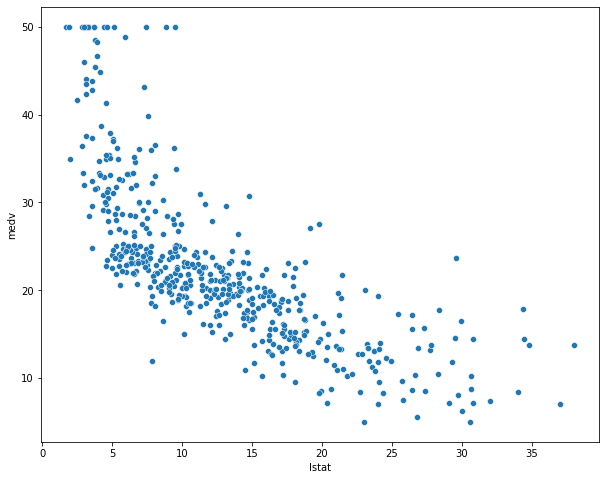

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="lstat",y="medv")
plt.show()

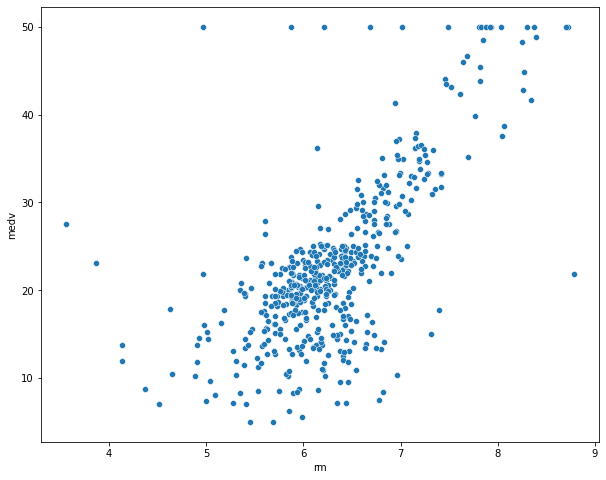

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="rm",y="medv")
plt.show()

In [17]:
features = df.drop("medv", 1).columns
target = df["medv"]

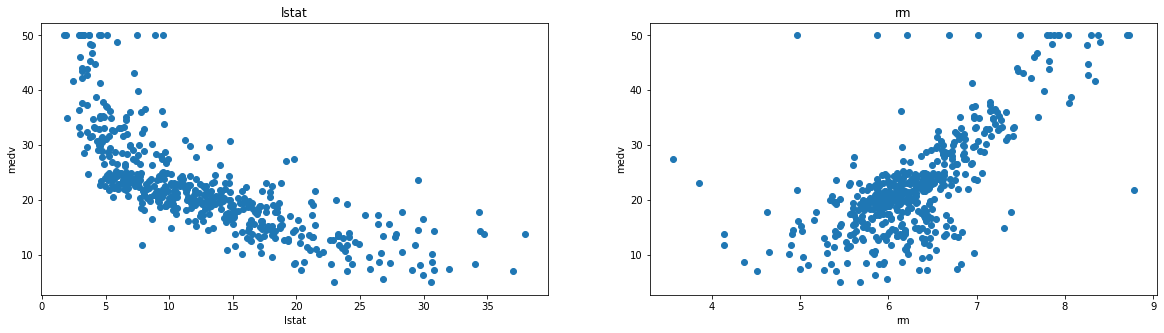

In [18]:
plt.figure(figsize=(20, 5))
features = ["lstat", "rm"]
target = df["medv"]

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("medv")

In [19]:
X = pd.DataFrame(np.c_[df["lstat"], df["rm"]], columns = ["lstat","rm"])
Y = df["medv"]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,Y_train)

LinearRegression()

In [23]:
lr.coef_

array([-0.65930795,  4.5389694 ])

In [24]:
lr.intercept_

2.493414527705191

In [25]:
y_pred = lr.predict(X_test)

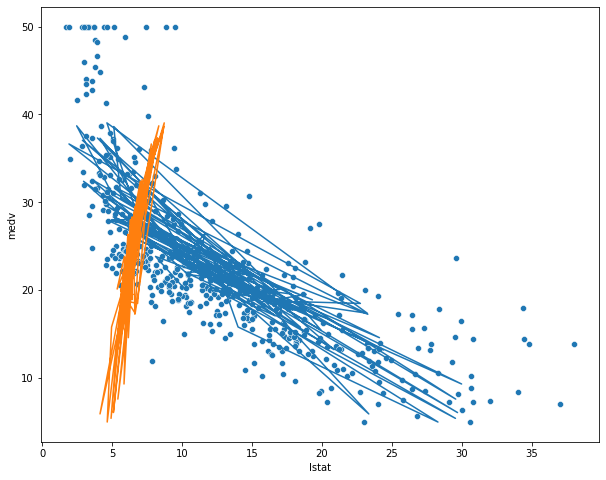

In [26]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df,x="lstat",y="medv")
plt.plot(X_test,y_pred)
plt.show()

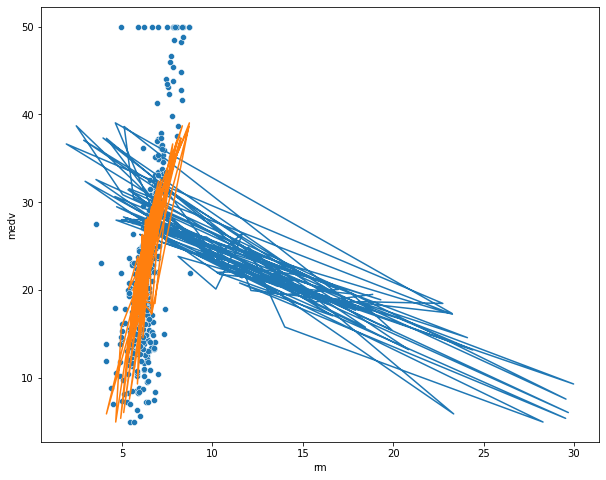

In [27]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df,x="rm",y="medv")
plt.plot(X_test,y_pred)
plt.show()

In [28]:
print("MSE -",mean_squared_error(Y_test,y_pred))
print("RMSE -",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("MEA -",mean_absolute_error(Y_test,y_pred))
print("R2 -",r2_score(Y_test,y_pred))

MSE - 32.08375607139395
RMSE - 5.664252472426874
MEA - 4.50521181335465
R2 - 0.6753556251471673


In [29]:
def model(col):
    
    X = df[[col]]
    y = df["medv"]
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    print("slope -",lr.coef_)
    print("intercept -",lr.intercept_)
    y_pred = lr.predict(X_test)
                                                        
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df,x=col,y="medv")
    plt.plot(X_test,y_pred)
    plt.show()
                                                        
    print("MSE -",mean_squared_error(Y_test,y_pred))
    print("RMSE -",np.sqrt(mean_squared_error(Y_test,y_pred)))
    print("MEA -",mean_absolute_error(Y_test,y_pred))
    print("R2 -",r2_score(Y_test,y_pred))

slope - [-0.9166916]
intercept - 34.22183685037716


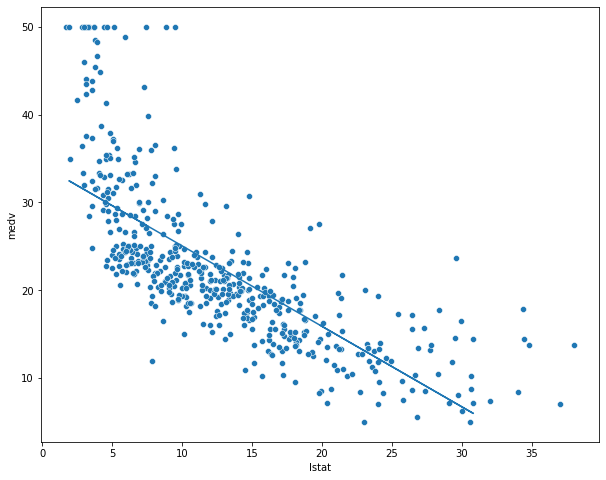

MSE - 42.620243471539716
RMSE - 6.528418144661057
MEA - 4.8152090945079875
R2 - 0.5349901044757203


In [30]:
model("lstat")

slope - [8.46109164]
intercept - -30.571032410898315


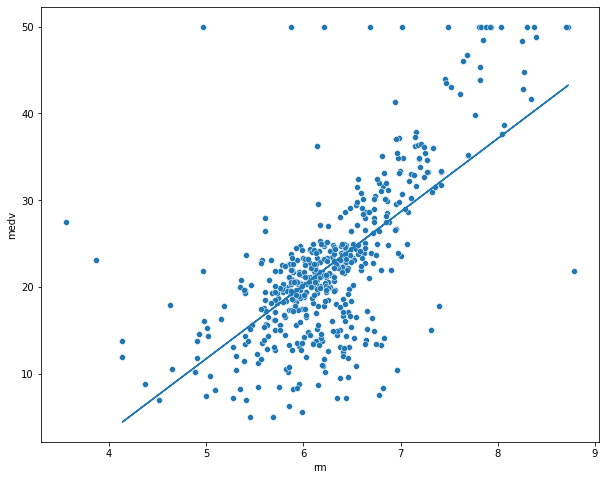

MSE - 36.517214730838624
RMSE - 6.042947520112898
MEA - 4.455731210109733
R2 - 0.6015774471545622


In [31]:
model("rm")

slope - [-0.42856699]
intercept - 23.943926325068514


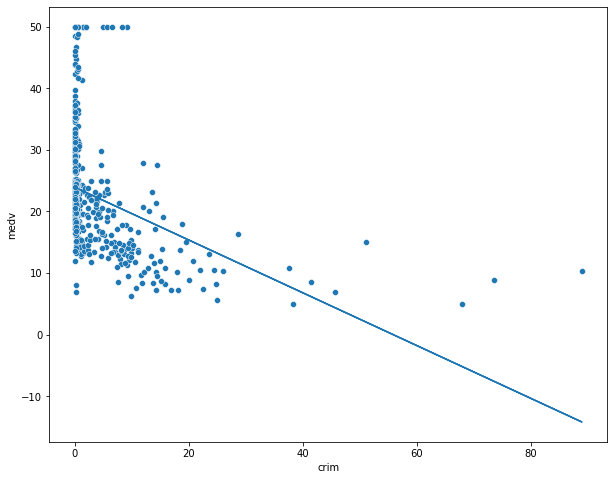

MSE - 80.67297029010636
RMSE - 8.981813307462271
MEA - 6.261723250961516
R2 - 0.11981428470050814


In [32]:
model("crim")

slope - [0.14762614]
intercept - 20.66193849661452


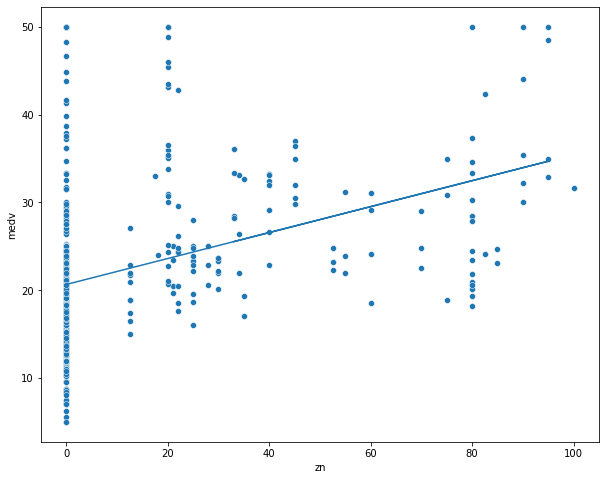

MSE - 83.63945285262714
RMSE - 9.145460778584486
MEA - 6.509713428210393
R2 - 0.08744835635020376


In [33]:
model("zn")

slope - [-0.62503497]
intercept - 29.40608041159733


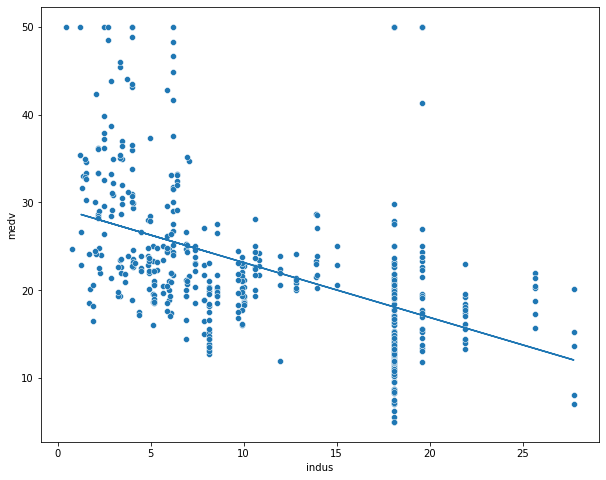

MSE - 68.98956009422056
RMSE - 8.305995430664561
MEA - 6.050792838421553
R2 - 0.24728660564546134


In [34]:
model("indus")

slope - [5.94753086]
intercept - 21.8358024691358


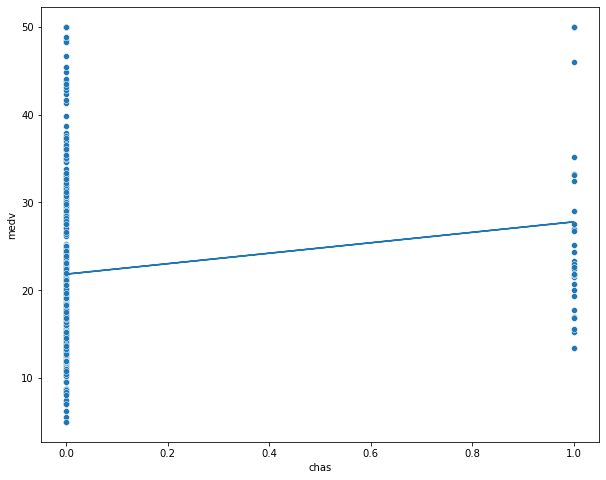

MSE - 90.00660291525281
RMSE - 9.48718097831241
MEA - 6.745423164392461
R2 - 0.017979307272948164


In [35]:
model("chas")

slope - [-34.60799093]
intercept - 41.557295928778515


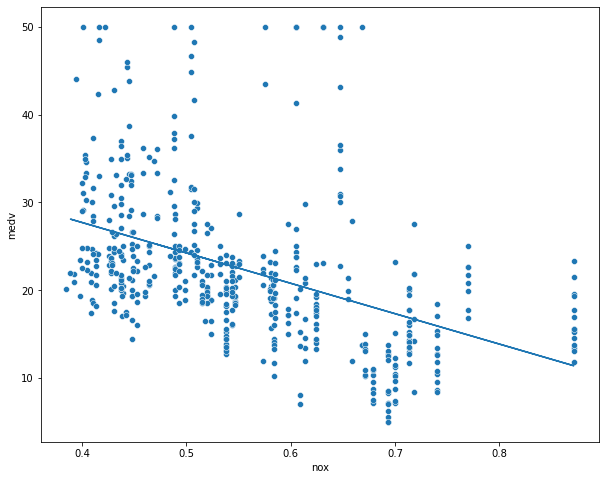

MSE - 79.4927253212281
RMSE - 8.915869297002288
MEA - 6.235441807529195
R2 - 0.13269139531667884


In [36]:
model("nox")

slope - [-0.13609352]
intercept - 31.715367091936738


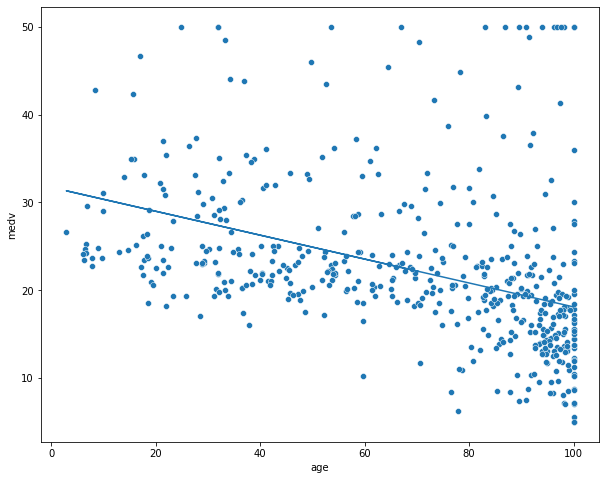

MSE - 86.89920583035703
RMSE - 9.321974352590605
MEA - 6.58914857638617
R2 - 0.051882689236609214


In [37]:
model("age")

slope - [1.24638042]
intercept - 17.569337613736312


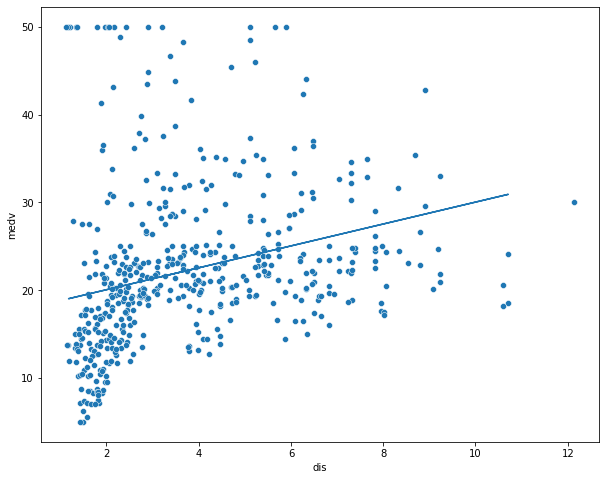

MSE - 91.40345570990517
RMSE - 9.560515452103258
MEA - 6.790731576916613
R2 - 0.0027388881857639547


In [38]:
model("dis")

slope - [-0.38083109]
intercept - 26.025500927114884


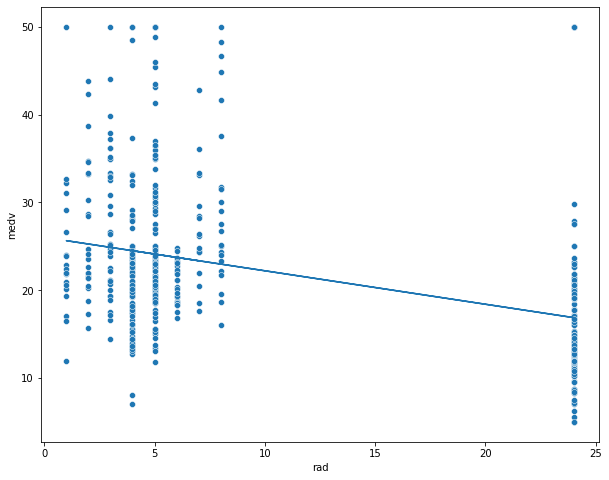

MSE - 77.30415120241693
RMSE - 8.792277930230421
MEA - 6.162779488085412
R2 - 0.15656992203169173


In [39]:
model("rad")

slope - [-0.02321693]
intercept - 31.835947848790454


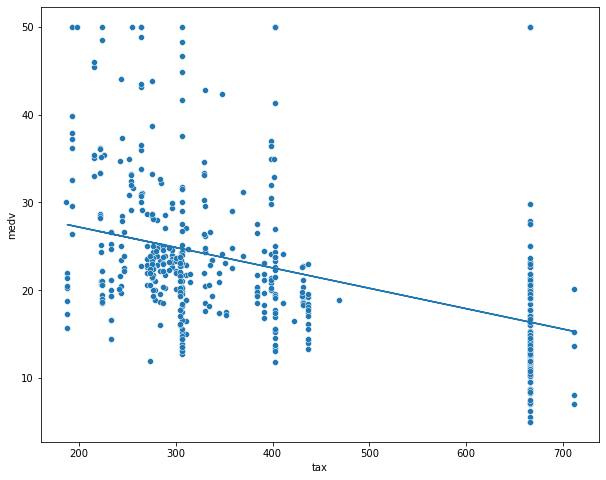

MSE - 67.1421833881659
RMSE - 8.194033401699429
MEA - 5.641519741304912
R2 - 0.26744248414601735


In [40]:
model("tax")

slope - [-2.13474825]
intercept - 61.72834793579091


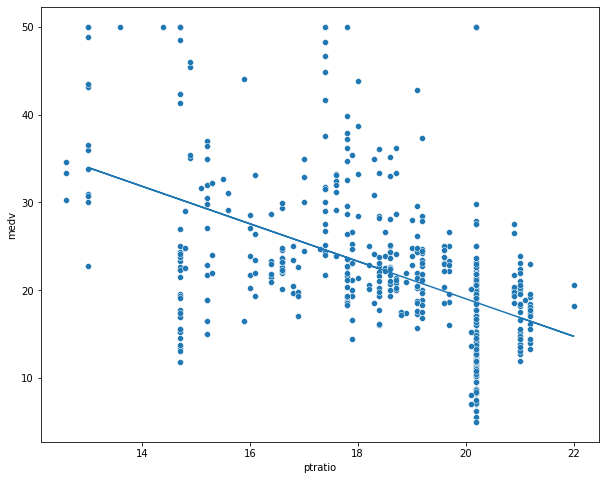

MSE - 68.41481947991122
RMSE - 8.27132513445767
MEA - 6.335976592604249
R2 - 0.2535573364354444


In [41]:
model("ptratio")

slope - [0.03230252]
intercept - 10.801659976646244


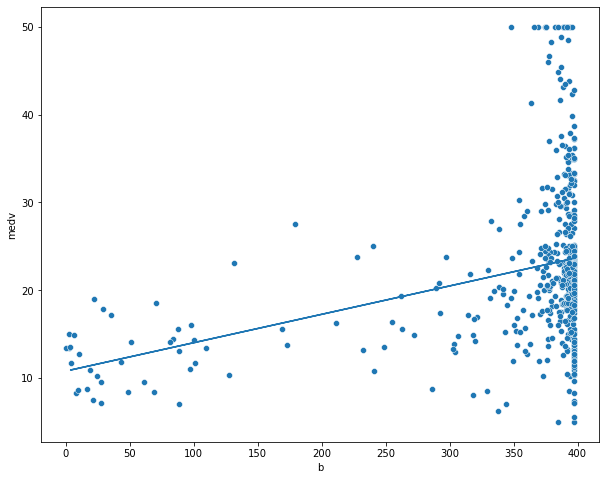

MSE - 80.69014287483375
RMSE - 8.982769220837957
MEA - 6.143862323759471
R2 - 0.11962692251813822


In [42]:
model("b")